In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [49]:
df = pd.read_csv(r"C:\Users\Vish\Desktop\ExcelR\Assignments\Linear Regression\Multiple Linear Regression\ToyotaCorolla2.csv")

df.head()

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0


In [50]:
df2 = df.iloc[:,1:17] #taking only required features
df2.head()

,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,automatic,cc,doors,cylinders,gears,quarterly_tax,weight
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170


In [51]:
df3 = df2.drop(["mfg_month","mfg_year","fuel_type","met_color","color","automatic","cylinders"],axis=1)

df3.head() #dropping unimportant features


,price,age_08_04,km,hp,cc,doors,gears,quarterly_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [52]:
df4 = df3.rename({'age_08_04': 'age', 'quarterly_tax': 'qtax'}, axis=1)

df4.head() #renaming columns

,price,age,km,hp,cc,doors,gears,qtax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [53]:
df4.count() #count for all features

price     1436
age       1436
km        1436
hp        1436
cc        1436
doors     1436
gears     1436
qtax      1436
weight    1436
dtype: int64

# Business Moments

In [54]:
df4.mean()

price     10730.824513
age          55.947075
km        68533.259749
hp          101.502089
cc         1576.855850
doors         4.033426
gears         5.026462
qtax         87.122563
weight     1072.459610
dtype: float64

In [55]:
df4.median()

price      9900.0
age          61.0
km        63389.5
hp          110.0
cc         1600.0
doors         4.0
gears         5.0
qtax         85.0
weight     1070.0
dtype: float64

In [56]:
df4.mode()

,price,age,km,hp,cc,doors,gears,qtax,weight
0,8950,68,36000,110,1600,5,5,85,1075


In [57]:
df4.var()

price     1.315487e+07
age       3.459596e+02
km        1.406734e+09
hp        2.244327e+02
cc        1.801041e+05
doors     9.075927e-01
gears     3.553619e-02
qtax      1.691563e+03
weight    2.771088e+03
dtype: float64

In [58]:
df4.std()

price      3626.964585
age          18.599988
km        37506.448872
hp           14.981080
cc          424.386770
doors         0.952677
gears         0.188510
qtax         41.128611
weight       52.641120
dtype: float64

# EDA

In [59]:
df4.isnull().sum() #finding null values

price     0
age       0
km        0
hp        0
cc        0
doors     0
gears     0
qtax      0
weight    0
dtype: int64

In [101]:
df4.dtypes #finding dtypes of features

price     int64
age       int64
km        int64
hp        int64
cc        int64
doors     int64
gears     int64
qtax      int64
weight    int64
dtype: object

In [60]:
df4.describe() #finding statistic of our features

,price,age,km,hp,cc,doors,gears,qtax,weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# Correlation Matrix

In [61]:
df4.corr() # Finding the correlation between all the features.

,price,age,km,hp,cc,doors,gears,qtax,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<li> We can observe that Price has a strong negative relationship with age and km.
<li> We can observe that Price has a positve relationship with weight.
<li> There is a positive relationship with age and km.
<li> There is a negative realtionship with age and weight.
<li>There is a positive realtionship with qtax and weight.

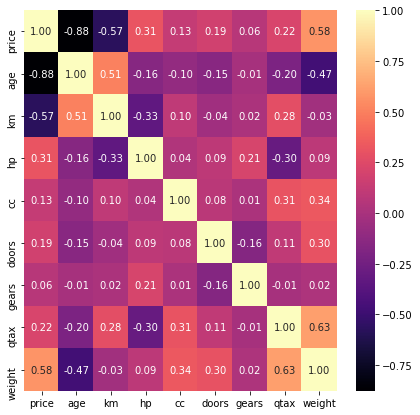

In [62]:
# Visualizing the correlation

fig, ax = plt.subplots(figsize=(7,7)) #for size

#Generate Heat Map, allow annotations and place floats in map

sns.heatmap(df4.corr(), annot=True, cmap='magma', fmt='.2f')

plt.show()

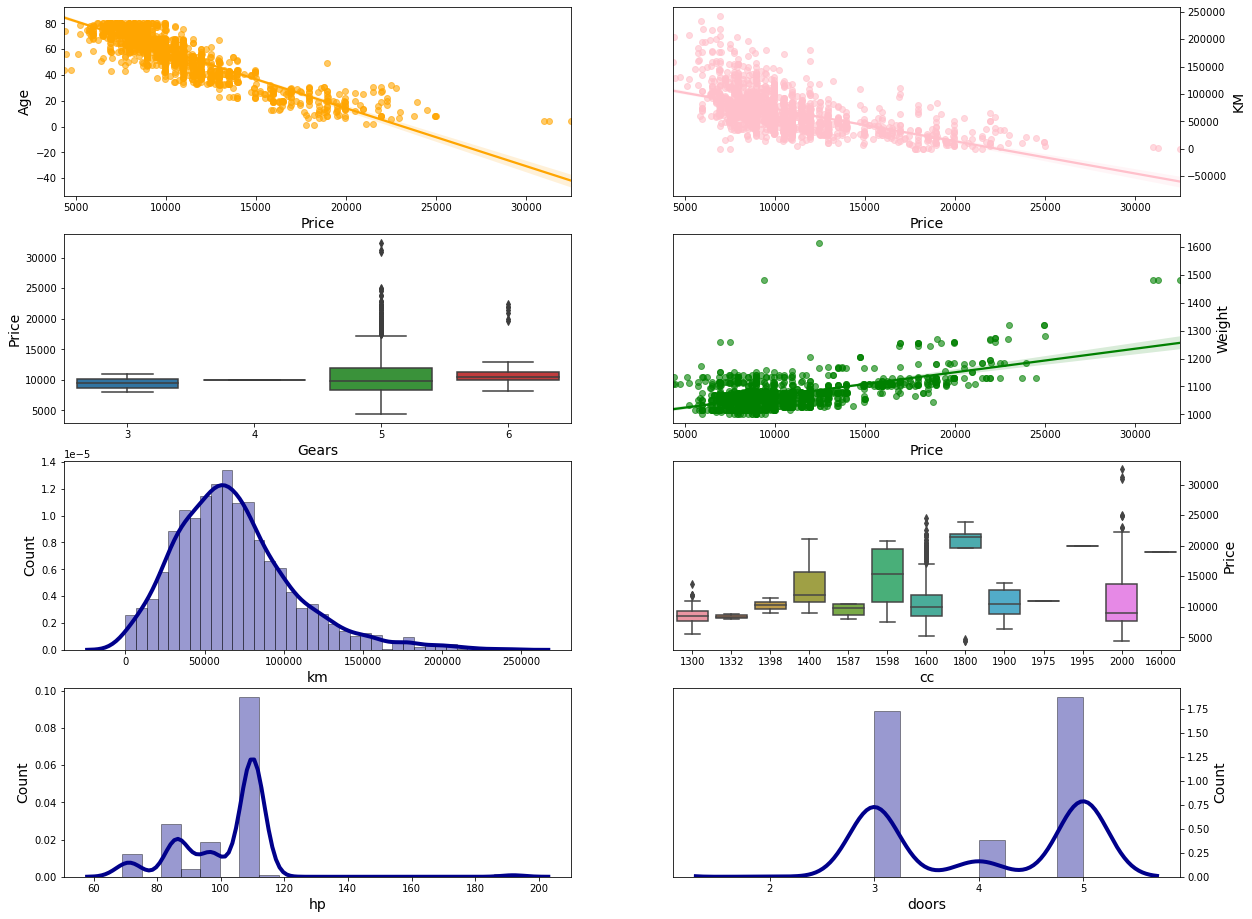

In [103]:
# plot regplots  for Age, KM, Gears & Weight against Price
f, axes = plt.subplots(4,2, figsize=(20,16))


# Age Vs Price
sns.regplot(x = 'price', y = 'age', data = df4, ax = axes[0,0], scatter_kws={'alpha':0.6}, color='orange')
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()


# KM Vs Price
sns.regplot(x = 'price', y = 'km', data = df4, ax = axes[0,1], scatter_kws={'alpha':0.6}, color='pink' )
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


# Gears Vs Price
sns.boxplot(x="gears", y="price", data=df4, width=0.8, ax = axes[1,0])
axes[1,0].set_xlabel('Gears', fontsize = 14)
axes[1,0].set_ylabel('Price', fontsize=14)
axes[1,0].yaxis.tick_left()


# Weight Vs Price
sns.regplot(x = 'price', y = 'weight', data = df4, ax = axes[1,1], scatter_kws={'alpha':0.6}, color='green')
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


# Density Plot of KM
sns.distplot(df4['km'], hist=True, kde=True, bins=int(180/5), ax = axes[2,0], color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
axes[2,0].set_xlabel('km', fontsize = 14)
axes[2,0].set_ylabel('Count', fontsize=14)
axes[2,0].yaxis.tick_left()


#Boxplot for categorical variable cc against Price
sns.boxplot(x="cc", y="price", data=df4, ax = axes[2,1] ,width=0.8)
axes[2,1].set_xlabel('cc', fontsize = 14)
axes[2,1].set_ylabel('Price', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()



# Density Plot of HP
sns.distplot(df4['hp'], hist=True, kde=True, bins=int(100/5), ax = axes[3,0], color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
axes[3,0].set_xlabel('hp', fontsize = 14)
axes[3,0].set_ylabel('Count', fontsize=14)
axes[3,0].yaxis.tick_left()


# Density plot for Doors
sns.distplot(df4['doors'], hist=True, kde=True, bins=int(60/5), ax = axes[3,1], color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
axes[3,1].set_xlabel('doors', fontsize = 14)
axes[3,1].set_ylabel('Count', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()



plt.show()


<li> We can observe that Price has a strong negative correlation with age and km.
<li> We can observe that Price has a postive correlation with weight. <br><br>
 
 Comparing categorical variables (Gears and CC) with Price we can observe:
<li> More the number of Gears more the Price.
<li> More the number of CC more the Price.
<li> We will take these relevant variables for our further ananlysis.

Model 1: Statsmodel

In [64]:
import statsmodels.formula.api as smf

In [65]:
X=df4[['age','km','gears','weight','cc','hp','doors','qtax']]

In [75]:
model = smf.ols('price~age+km+hp+cc+gears+weight+doors+qtax', data=df4).fit()

In [67]:
#Coefficients
model.params

Intercept   -5573.106358
X[0]         -121.658402
X[1]           -0.020817
X[2]          594.319936
X[3]           16.958632
X[4]           -0.121100
X[5]           31.680906
X[6]           -1.616641
X[7]            3.949081
dtype: float64

In [68]:
#t and p-Values
print(model.tvalues, '\n','\n', model.pvalues)

Intercept    -3.948666
X[0]        -46.511852
X[1]        -16.621622
X[2]          3.016007
X[3]         15.879803
X[4]         -1.344222
X[5]         11.241018
X[6]         -0.040410
X[7]          3.014535
dtype: float64 
 
 Intercept     8.241949e-05
X[0]         3.354724e-288
X[1]          7.538439e-57
X[2]          2.606549e-03
X[3]          2.048576e-52
X[4]          1.790902e-01
X[5]          3.757218e-28
X[6]          9.677716e-01
X[7]          2.619148e-03
dtype: float64


In [69]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

### Predicting for new data

In [72]:
new_data=pd.DataFrame({'age': 56,'km': 68000, 'hp':100, 'cc': 1600,'doors':4,'gears':5,'qtax': 86, 'weight': 1100},index=[1])


In [76]:
model.predict(new_data)

1    11132.037549
dtype: float64

In [77]:
model.predict(df4.iloc[0:5,])

0    16812.580505
1    16272.355186
2    16800.732460
3    16426.496731
4    16222.419010
dtype: float64

# Model 2 : Sklearn Model

In [87]:
from sklearn.model_selection import train_test_split 

In [81]:
X = df4.iloc[:,1:].values
y = df4.iloc[:,0].values

In [88]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/3, random_state=0)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
regressor = LinearRegression() #Regression object created

### Training the model

In [91]:
regressor.fit(X_train, y_train) # Training model

LinearRegression()

In [92]:
from sklearn.metrics import r2_score

#R squared values
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.8838862770307204


### Predicting Data

In [93]:
y_pred = regressor.predict(X_test) # predicting

In [94]:
y_pred

array([ 8229.82109143, 10442.51570807, 12901.65730736,  7670.28453975,
       10475.01020087,  9526.9959886 ,  6313.39009672, 16346.10692596,
       11300.00646822, 10391.91985197,  7106.12684787, 11165.74088244,
       11753.55666094,  9734.29514014,  7454.73510013, 16241.77826062,
       11141.0767085 ,  7677.70188174, 12775.21803334,  8816.38524311,
        6712.12236461,  6145.91821307, 11624.16105251, 12275.03260496,
       19127.47191885,  7748.31439269, 13963.10597611,  5824.59248414,
        9255.89390013,  7837.26094191, 10731.66343902,  7656.83526351,
       16095.50380848,  7251.35991488, 11188.94518261, 12889.70051458,
        9884.78154265, 12187.74933266,  9867.32846556,  8955.44343536,
        8702.50119585, 10571.70267071,  9920.46375051, 17233.33895174,
       10888.51626871,  7033.76095683,  9521.14216668,  7649.05748277,
        8384.69017639,  8729.9457587 , 19363.56163364,  8408.5553614 ,
        7106.37791003,  6490.7789779 , 11436.94695822, 18293.33751449,
      

In [96]:
x_test_new = [[ 56, 68000, 100,  1600, 4, 5, 86, 1100]]


In [97]:
regressor.predict(x_test_new)

array([11353.38926992])

### R sqaure and Predicted values for Model 1, Model 2.

In [104]:
df5 = pd.DataFrame(np.array([['Model1',86,11132], ['Model2',88,11353]]),
                   columns= ['Model', 'R2_Square','Price'])

df5.head()

,Model,R2_Square,Price
0,Model1,86,11132
1,Model2,88,11353
